In [7]:
#Importações gerais
#import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

1. Desenvolva um sistema para abrir, exibir, manipular e salvar imagens RGB com 24
bits/pixel (8 bits/componente/pixel). Não use bibliotecas ou funções especiais de processamento de imagens. Para os itens 1.3 a 1.8, duas formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, com posterior conversão para RGB. <br>

Bits para cada unsigned int de RGB: uint8


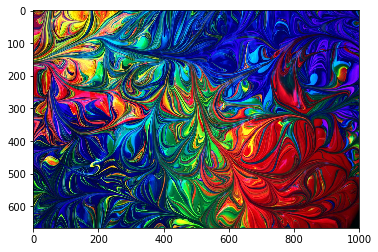

In [8]:
#Carregando a imagem na memória, exemplo:
def carregaRGB(img_file):
    imgPIL = Image.open(img_file)
    pic = np.asarray(imgPIL)
    return pic

img = carregaRGB("rainbow.png")
print("Bits para cada unsigned int de RGB:", img.dtype)
plt.imshow(img)
plt.show()

1.2. Exibição de bandas individuais (R, G e B) como imagens monocromáticas ou
coloridas (em tons de R, G ou B, respectivamente)(Xerxes)<br>

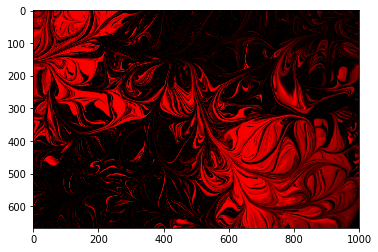

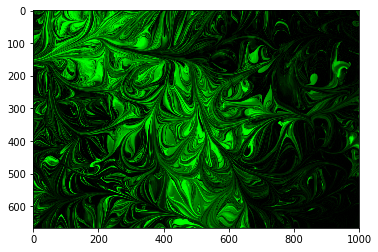

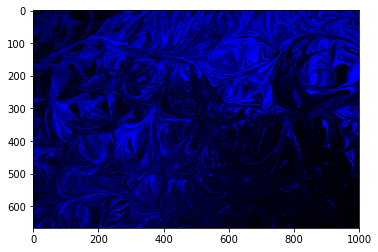

In [9]:
def separateRGB(img):
    #print('Iniciando separação de imagem...')
    img = Image.fromarray(np.uint8(img))
    #Pegamos cada 'Valor' em pixels
    data = img.getdata()
    #print('Data:', data)

    #Vamos então suprimir cada uma das bandas((255, 120, 65) -> (0, 120, 0) para G)
    r = [(d[0], 0, 0) for d in data]#Mantemos o valor de Vermelho e zeramos os valores de Verde e Azul
    
    g = [(0, d[1], 0) for d in data]#Mantemos o valor de Verde e zeramos os valores de Vermelho e Azul
    
    b = [(0, 0, d[2]) for d in data]#Mantemos o valor de Azul e zeramos os valores de Vermelho e Verde

    #Salva imagens em R, G e B
    img.putdata(r)#Mudamos apenas os valores para R
    imgRed = img.copy()
    
    img.putdata(g)#Mudamos apenas os valores para G
    imgGreen = img.copy()
    
    img.putdata(b)#Mudamos apenas os valores para B
    imgBlue = img.copy()

    #print('Conversão Completa!')

    return r, g, b, imgRed, imgGreen, imgBlue

def separateYIQ(img):
    Ychannel = img[:,:,0]
    Ichannel = img[:,:,1]
    Qchannel = img[:,:,2]
    #print('Iniciando separação de imagem...')
    img = Image.fromarray(np.uint8(img))
    #Pegamos cada 'Valor' em pixels
    data = img.getdata()
    #print('Data:', data)

    #Vamos então suprimir cada uma das bandas((255, 120, 65) -> (0, 120, 0) para G)
    y = [(d[0], 0, 0) for d in data]#Mantemos o valor de Vermelho e zeramos os valores de Verde e Azul
    
    i = [(0, d[1], 0) for d in data]#Mantemos o valor de Verde e zeramos os valores de Vermelho e Azul
    
    q = [(0, 0, d[2]) for d in data]#Mantemos o valor de Azul e zeramos os valores de Vermelho e Verde

    #print('Conversão Completa!')

    return y, i, q, Ychannel, Ichannel, Qchannel

img = carregaRGB("rainbow.png")

r, g, b, imgRed, imgGreen, imgBlue = separateRGB(img)

plt.imshow(imgRed)
plt.show()

plt.imshow(imgGreen)
plt.show()

plt.imshow(imgBlue)
plt.show()

O sistema deve ter as seguintes funcionalidade: <br>

1.1. Conversão RGB-YIQ-RGB (cuidado com os limites de R, G e B na volta!)(Douglas)<br>

Conversão para RGB->YIQ
Conversão para YIQ->RGB


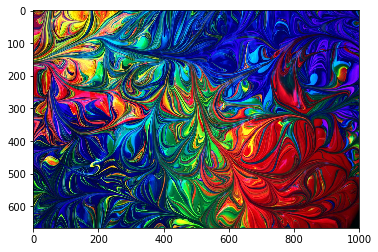

In [10]:
#Converte uma imagem
'''
Y = 0.299R + 0.587G + 0.114B
I = 0.596R – 0.274G – 0.322B
Q = 0.211R – 0.523G + 0.312B
'''
#Função que realiza o truncamento de pixels para caso e vai arredondar para o teto se x > 0.5 ou piso se x < 0.5
def trunca(number):
    if (number > 255):
        return 255

    elif(number < 0):
        return 0
    else:
        return int(round(number))
    
trunca_vetorizado = np.vectorize(trunca)


def converteRGB_YIQ(imgRGB):
    print("Conversão para RGB->YIQ")
    #Primeiro nos pegamos as imagens separadas na função 1.2 e transformamos elas em arrays
    r, g, b, imgRed, imgGreen, imgBlue = separateRGB(imgRGB)
    imgRed = np.asarray(imgRed)
    imgGreen = np.asarray(imgGreen)
    imgBlue = np.asarray(imgBlue)
    #Depois pegamos isolamos o canal que queremos usar para os calculos
    RedChannel = imgRed[:,:,0]
    GreenChannel = imgGreen[:,:,1]
    BlueChannel = imgBlue[:,:,2]
    
    #E aqui aplicamos as formulas em cada canal
    Ychannel = (0.299 * RedChannel) + (0.587 * GreenChannel) + (0.114 * BlueChannel)
    Ichannel = (0.596 * RedChannel) - (0.274 * GreenChannel) - (0.322 * BlueChannel)
    Qchannel = (0.211 * RedChannel) - (0.523 * GreenChannel) + (0.312 * BlueChannel)

    #Por ultimo nos empilhamos novamente os três canais para formar a imagem em YIQ
    imgYIQ = np.stack((Ychannel, Ichannel, Qchannel), axis = 2)
    return imgYIQ

'''
R = 1.000 Y + 0.956 I + 0.621 Q
G = 1.000 Y – 0.272 I – 0.647 Q
B = 1.000 Y – 1.106 I + 1.703 Q
'''
def converteYIQ_RGB(imgYIQ):
    print("Conversão para YIQ->RGB")
    #Como a função que transforma em YIQ já os deixa em array, apenas precisamos isolar os canais
    Ychannel = imgYIQ[:,:,0]
    Ichannel = imgYIQ[:,:,1]
    Qchannel = imgYIQ[:,:,2]
    
    #E após isso aplicar as formulas de conversão
    RedChannel = Ychannel + (0.956 * Ichannel) + (0.621 * Qchannel)
    GreenChannel = Ychannel - (0.274 * Ichannel) - (0.647 * Qchannel)
    BlueChannel = Ychannel - (1.106 * Ichannel) + (1.703 * Qchannel)
    
    imgRGB = np.stack((RedChannel, GreenChannel, BlueChannel), axis = 2)
    #Função vetorizada para maximizar desempenho aplicando em paralelo em cada pixel
    trunca_vetorizado = np.vectorize(trunca)
    #Fazemos então a normalização da imagem
    imgRGB = trunca_vetorizado(imgRGB)
    return imgRGB



#Carregamos a imagem e fazemos as conversões
img = carregaRGB("rainbow.png")
img = converteRGB_YIQ(img)


img = converteYIQ_RGB(img)
#Ela está pronta novamente para ser plottada
plt.imshow(img)
plt.show()

1.3. Negativo(Rebeca)<br>

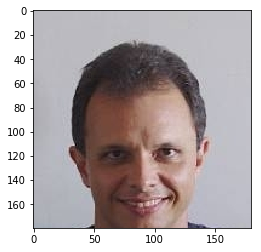

In [67]:
#Original
img = carregaRGB("leonardo.png")
plt.imshow(img)
plt.show()

Aplicando filtro negativo...
Filtro negativo aplicado com sucesso!


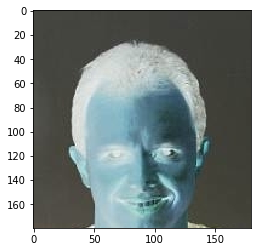

In [55]:
#Nativo em RGB
#Transforma uma imagem "normal" em uma negativa
def negativeFilter(img_file):
  
	print('Aplicando filtro negativo...')

	#Transformamos as imagens isoladas R,G,B resultantes do separateRGB para arrays
	r, g, b, imgRed, imgGreen, imgBlue = separateRGB(img_file)
	imgRed = np.asarray(imgRed)
	imgGreen = np.asarray(imgGreen)
	imgBlue = np.asarray(imgBlue)
    
	#Isolamos os canais de cada cor e calculamos o negativo de cada um
	negativeRed = 255 - imgRed[:,:,0] 
	negativeGreen = 255 - imgGreen[:,:,1]
	negativeBlue = 255 - imgBlue[:,:,2]
    
	#Empilhamos os resultantes dos calculos do negativo 
	negativeImg = np.stack((negativeRed, negativeGreen, negativeBlue), axis = 2)
	print("Filtro negativo aplicado com sucesso!")
	return negativeImg

#Carregamos a imagem
img = carregaRGB("leonardo.png")
negative = negativeFilter(img)

#Normalizamos a imagem usando as funções de truncamento e arredondamento 
img = trunca_vetorizado(img)

#Plottamos e salvamos imagem
plt.imshow(negative)
plt.show()
negative = Image.fromarray(np.uint8(negative), "RGB")
negative.save("leonardoNegative.png")

Conversão para RGB->YIQ
Aplicando negativo na banda Y...
Filtro negativo em Y aplicado com sucesso...
Conversão para YIQ->RGB


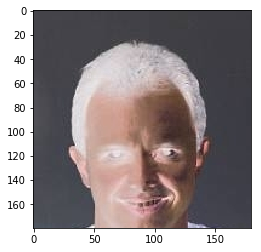

In [76]:
#Negativo em YIQ
#Transforma uma imagem "normal" em negativa apenas na banda Y
def negativeFilterY(img_file):
    #Converte a imagem RGB em imagem YIQ
    img_file = converteRGB_YIQ(img_file)
    
    #A imagem já vem em array, só isolamos os canais para fazer o que desejamos
    #Inverte apenas a banda Y
    print("Aplicando negativo na banda Y...")
    negativeYchannel = 255.0 - img_file[:,:,0]
    Ichannel = img_file[:,:,1]
    Qchannel = img_file[:,:,2]
    
    #Empilhamos as bandas, dessa vez com Ynegativo
    negativeY = np.stack((negativeYchannel, Ichannel, Qchannel), axis = 2)
    print("Filtro negativo em Y aplicado com sucesso...")
    return negativeY

#Carregamos a imagem
img = carregaRGB("leonardo.png")

#Aplicamos o filtro
negativeY = negativeFilterY(img)

#Reconvertemos para RGB e truncamos a imagem
img = converteYIQ_RGB(negativeY)

#Plotamos e salvamos

plt.imshow(img)
plt.show()
negativeY = Image.fromarray(np.uint8(img), "RGB")
negativeY.save("leonardoNegativeY.png")

1.4. Controle de brilho aditivo (valor do pixel resultante = valor do pixel original + c, c
inteiro) (cuidado com os limites de R, G e B!)(Pedro)<br>

Antes:


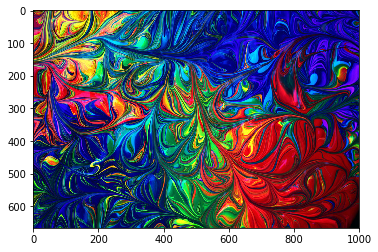

Depois:


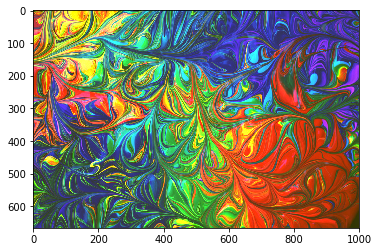

In [7]:
#Brilho adivitivo em RGB
#Adiciona um brilho aditivo a partir de uma constante c
def brilhoAditivo(img):
    c = 50
    data = img.getdata()
    
    brilho = [(limite(int(d[0] + c)), limite(int(d[1]) + c), limite(int(d[2]))) for d in data]
  
    return brilho
  
def limite(n):
    if n > 255:
        n = 255
    elif n < 0:
        n = 0

    return n

img = Image.open("rainbow.png")
print('Antes:')
plt.imshow(img)
plt.show()

brilho = np.asarray(brilhoAditivo(img))
print('Depois:')
plt.imshow(brilho.reshape(667, 1000, 3))
plt.show()

Antes:


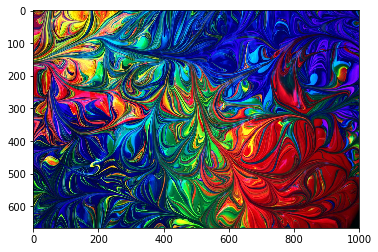

Depois:
Conversão para RGB->YIQ
Brilho aditivo apenas na banda Y..
Conversão para YIQ->RGB


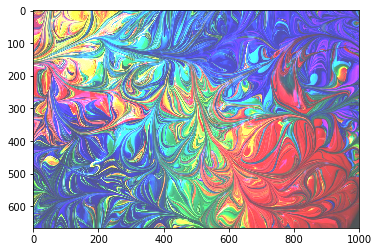

In [22]:
#Brilho aditivivo em YIQ
#Adiciona um brilho aditivo a partir de uma constante c
def brilhoAditivoYIQ(img_YIQ, c):
    #Funções auxiliar de soma
    def soma(x, c):
        return x + c
    y, i, q, Ychannel, Ichannel, Qchannel = separateYIQ(img_YIQ)
    
    sum_vectorized = np.vectorize(soma)

    Ychannel = sum_vectorized(Ychannel, c)
    
    img = np.stack((Ychannel, Ichannel, Qchannel), axis = 2)
  
    return img

img = Image.open("rainbow.png")
print('Antes:')
plt.imshow(img)
plt.show()


print('Depois:')
img = converteRGB_YIQ(img)

print("Brilho aditivo apenas na banda Y..")
img = brilhoAditivoYIQ(img, 80)

img = converteYIQ_RGB(img)

plt.imshow(img)
plt.show()

1.5. Controle de brilho multiplicativo (valor do pixel resultante = valor do pixel original
x c, c real não negativo) (cuidado com os limites de R, G e B!)(Douglas)<br>

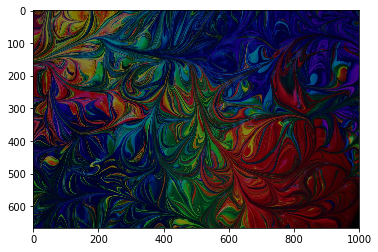

In [27]:
#BrilhoMult em RGB
def brilhoMult(img, c):
    #Funções auxiliar de multiplicação
    def Multiply(x, c):
        return x * c
    #Função auxiliar de truncamento e arredondamento
    def trunca(number):
        if (number > 255):
            return 255
        elif(number < 0):
            return 0
        else:
            return int(round(number))
    #Primeiro a gente cria o modelo de vetorização para as funções auxiliares
    multiply_vectorized = np.vectorize(Multiply)
    trunca_vectorized = np.vectorize(trunca)
    #Aplicamos 
    img = trunca_vectorized(multiply_vectorized(img, c))
    return img

img = carregaRGB("rainbow.png")
img = brilhoMult(img, 0.5)

plt.imshow(img)
plt.show()

Conversão para RGB->YIQ
Aplicando multiplicação apenas na banda Y...
Recriação da imagem YIQ, com valores de Y alterados..
Conversão YIQ->RGB
Conversão para YIQ->RGB


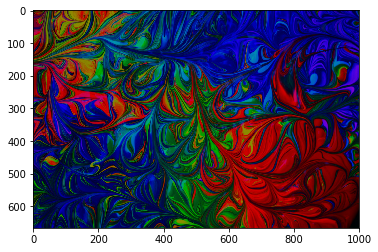

In [73]:
#BrilhoMult em YIQ

def brilhoMultYIQ(img_YIQ, c):
    #Funções auxiliar de multiplicação
    def Multiply(x, c):
        return x * c
    #Função auxiliar de truncamento e arredondamento
    def trunca(number):
        if (number > 255):
            return 255
        elif(number < 0):
            return 0
        else:
            return int(round(number))
    #Separação dos canais YIQ
    y, i, q, Ychannel, Ichannel, Qchannel = separateYIQ(img_YIQ)

    #Primeiro a gente cria o modelo de vetorização para as funções auxiliares
    
    multiply_vectorized = np.vectorize(Multiply)
    #Aplicamos a multiplicação apenas na banda Y
    print("Aplicando multiplicação apenas na banda Y...")
    #print(Ychannel[:5,:5])
    Ychannel = multiply_vectorized(Ychannel, c)
    print("Recriação da imagem YIQ, com valores de Y alterados..")
    #print(Ychannel[:5,:5])
    img = np.stack((Ychannel, Ichannel, Qchannel), axis = 2)
    
    return img


img = carregaRGB("rainbow.png")

img = brilhoMultYIQ(converteRGB_YIQ(img), 0.5)

print("Conversão YIQ->RGB")
img = converteYIQ_RGB(img)

plt.imshow(img)
plt.show()

1.6. Convolução m x n com bias (viés, offset). Testar com filtros Média e Sobel. (Xerxes)<br>

In [ ]:
#Convolução em RGB

In [ ]:
#Convolução em YIQ

1.7. Filtro mediana m x n. (Rebeca) <br>

Filtrada com sucesso!


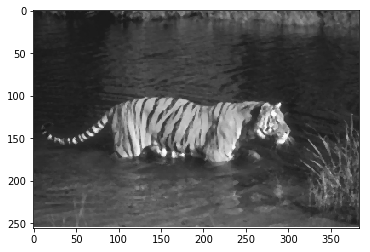

In [9]:
#Filtro Mediana RGB
def medianBlur(originalImg):
    #Transforma de array em imagem
    originalImg = Image.fromarray(np.uint8(originalImg), "RGB")
    
    #Cria a "máscara"
    filterPoints = [(0,0)] * 9 
    
    #Cria imagem em branco a partir do tamanho da original
    width, height = originalImg.size 
    filteredImage = Image.new("RGB",(width,height),"white") #Para trocar o tipo de imagem (RGB, Grayscale), só mudar o "RGB"
    
    #Percorre cada ponto que compõe a imagem - Linha e coluna
    for i in range(1,width-1):
        for j in range(1,height-1):
            filterPoints[0] = originalImg.getpixel((i-1,j-1))
            filterPoints[1] = originalImg.getpixel((i-1,j))
            filterPoints[2] = originalImg.getpixel((i-1,j+1))
            filterPoints[3] = originalImg.getpixel((i,j-1))
            filterPoints[4] = originalImg.getpixel((i,j)) #Ponto que será atualizado com a mediana
            filterPoints[5] = originalImg.getpixel((i,j+1))
            filterPoints[6] = originalImg.getpixel((i+1,j-1))
            filterPoints[7] = originalImg.getpixel((i+1,j))
            filterPoints[8] = originalImg.getpixel((i+1,j+1))
            filterPoints.sort() #Ordena os pontos
            filteredImage.putpixel((i,j),(filterPoints[4])) #Preenche cada pixel com o valor da mediana na nova imagem
    
    #Retorna imagem filtrada
    print("Filtrada com sucesso!")
    return filteredImage


#Carregamos a imagem
img = carregaRGB("ruido.png")
medianBlurred = medianBlur(img)

#Plottamos e salvamos a imagem
plt.imshow(medianBlurred)
plt.show()
medianBlurred.save("medianBlurred.png")

In [ ]:
#Filtro Mediano em YIQ


1.8. Limiarização com limiar m escolhido pelo usuário. (Pedro)<br>

Digite o limiar m:	5
Antes:


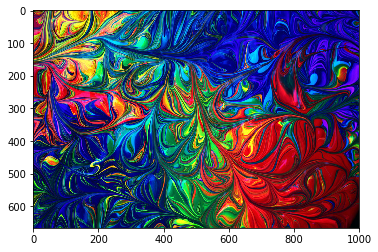

Depois:


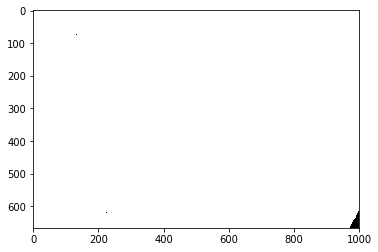

In [21]:
#Limiarização em RGB
#Utiliza o limiar 'm' informado pelo usuário para fazer a limiarização
m = int(input('Digite o limiar m:\t'))

def limiarizacao(img, m):
    m = m
    data = img.getdata()

    l = [(limiar(int(d[0]), int(d[1]), int(d[2]), m)) for d in data]

    return l

def limiar(n1, n2, n3, m):
    soma = n1 + n2 + n3
    m = 3 * m
    if soma >= m:
        n1 = 255
        n2 = 255
        n3 = 255
    elif soma < m:
        n1 = 0
        n2 = 0
        n3 = 0

    return n1, n2, n3

img = Image.open("rainbow.png")
print('Antes:')
plt.imshow(img)
plt.show()

brilho = np.asarray(limiarizacao(img, m))
print('Depois:')
plt.imshow(brilho.reshape(667, 1000, 3))
plt.show()

In [ ]:
#Limiarização em YIQ
